In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')


In [43]:
def title_simplifier(title):
    if 'director' in title.lower():
        return 'director'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    else:
        return 'other'

In [44]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [45]:
df.job_simp.value_counts()

data scientist    930
mle                52
analyst             7
data engineer       2
Name: job_simp, dtype: int64

In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'Type of Ownership', 'job_state', 'some_state', 'age',
       'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'R_yn', 'job_simp'],
      dtype='object')

In [16]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Industry,...,Type of Ownership,job_state,some_state,age,python_yn,spark_yn,aws_yn,excel_yn,R_yn,job_simp
0,Data Scientist,$103k-$164k (Glassdoor Est.),"At Sonos, we're passionate about bringing musi...",4.1,Sonos\n4.1,"San Francisco, CA",-1,1001 to 5000 Employees,2002,Consumer Products Manufacturing,...,Public,CA,0,18,1,0,0,0,1,data sccientist
1,Lead Data Scientist,$130k-$205k (Glassdoor Est.),Who we are: Fueled by a fundamental belief tha...,4.0,PayPal\n4.0,"San Jose, CA",-1,10000+ Employees,1998,Internet,...,Public,CA,0,22,1,0,0,0,1,data sccientist
2,"Full Stack Data Scientist, Supply DS",$115k-$184k (Glassdoor Est.),Company Description\n\nWish is a mobile e-comm...,3.5,Wish\n3.5,"San Francisco, CA",-1,501 to 1000 Employees,2011,Other Retail Stores,...,Private,CA,0,9,1,0,0,0,1,data sccientist
3,Data Scientist - Onsite after SIP - W2 contract,$106k-$167k (Glassdoor Est.),Title: IT - Data Scientist*\nLocation: San Fra...,3.7,Finezi\n3.7,"San Francisco, CA",-1,51 to 200 Employees,2007,IT Services,...,Private,CA,0,13,1,1,1,0,1,data sccientist
4,Data Scientist 1,$94k-$152k (Glassdoor Est.),Who we are: Fueled by a fundamental belief tha...,4.0,PayPal\n4.0,"San Jose, CA",-1,10000+ Employees,1998,Internet,...,Public,CA,0,22,1,0,0,1,1,data sccientist


In [27]:
df.shape


(991, 29)

In [49]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'

In [50]:
df['seniority'] = df['Job Title'].apply(seniority)

In [51]:
df.seniority.value_counts()

senior    535
na        455
junior      1
Name: seniority, dtype: int64

In [52]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2223
1      3410
2      3173
3      5446
4      4477
       ... 
986    5340
987    4261
988    3467
989    3531
990    2976
Name: desc_len, Length: 991, dtype: int64

In [57]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [58]:
df.company_txt

0                     Sonos
1                    PayPal
2                      Wish
3                    Finezi
4                    PayPal
               ...         
986    Albertsons Companies
987            Oportun. Inc
988               DiDi Labs
989                   Nauto
990          UrbanFootprint
Name: company_txt, Length: 991, dtype: object

In [59]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,average_salary,some_state,age,python_yn,spark_yn,aws_yn,excel_yn,R_yn,desc_len
count,991.000000,991.0,991.000000,991.0,991.0,991.0,991.000000,991.000000,991.000000,991.0,991.000000,991.000000,991.000000,991.000000,991.000000,991.0,991.000000
mean,2.892936,-1.0,1405.400605,-1.0,0.0,0.0,119.717457,193.626640,156.672048,0.0,22.894046,0.797175,0.315843,0.241171,0.445005,1.0,3790.577195
std,1.979958,0.0,905.504981,0.0,0.0,0.0,24.059919,41.997353,32.958490,0.0,32.809242,0.402307,0.465085,0.428010,0.497217,0.0,1723.007125
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,65.000000,108.000000,86.500000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0,132.000000
25%,3.000000,-1.0,-1.000000,-1.0,0.0,0.0,100.000000,161.000000,130.500000,0.0,-1.000000,1.000000,0.000000,0.000000,0.000000,1.0,2662.500000
50%,3.600000,-1.0,1983.000000,-1.0,0.0,0.0,126.000000,198.000000,162.000000,0.0,10.000000,1.000000,0.000000,0.000000,0.000000,1.0,3728.000000
75%,4.200000,-1.0,2006.000000,-1.0,0.0,0.0,139.000000,230.000000,184.500000,0.0,36.000000,1.000000,1.000000,0.000000,1.000000,1.0,4509.000000
max,5.000000,-1.0,2019.000000,-1.0,0.0,0.0,163.000000,260.000000,211.500000,0.0,202.000000,1.000000,1.000000,1.000000,1.000000,1.0,11865.000000


In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'Type of Ownership', 'job_state', 'some_state', 'age',
       'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'R_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

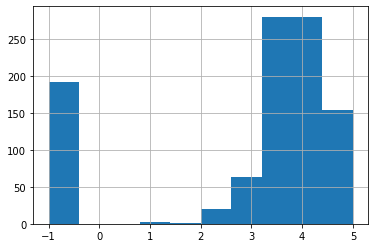

In [61]:
df.Rating.hist()

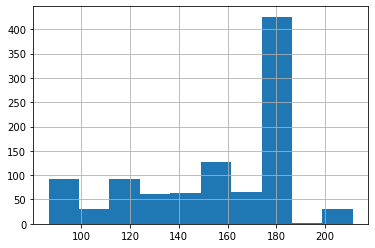

In [62]:
df.average_salary.hist()

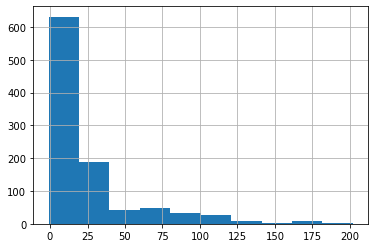

In [63]:
df.age.hist()

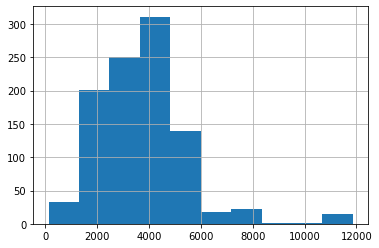

In [64]:
df.desc_len.hist()

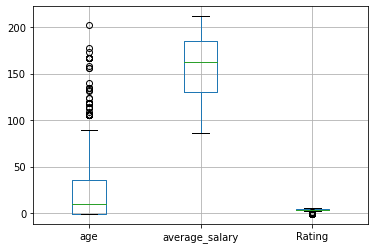

In [67]:
df.boxplot(column = ['age', 'average_salary', 'Rating'])

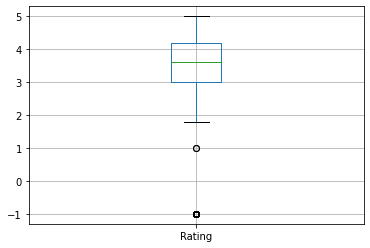

In [68]:
df.boxplot(column = ['Rating'])

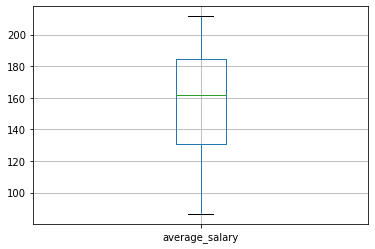

In [70]:
df.boxplot(column = ['average_salary'])

In [72]:
df[['age', 'average_salary', 'Rating', 'desc_len']].corr()
# See a negative correlation between the rating and the average salary
#Positive correlation between age and rating

,age,average_salary,Rating,desc_len
age,1.000000,0.007332,0.317141,0.254914
average_salary,0.007332,1.000000,-0.188907,0.059896
Rating,0.317141,-0.188907,1.000000,0.172763
desc_len,0.254914,0.059896,0.172763,1.000000


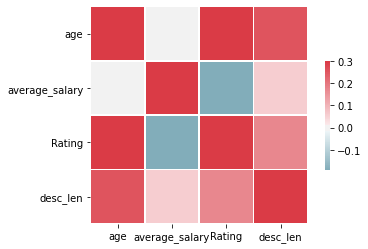

In [105]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'average_salary', 'Rating', 'desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Looks like a strong relationship between age and desc_len
# And a dtrong relationship between age and Rating

In [74]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'Type of Ownership', 'job_state', 'some_state', 'age',
       'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'R_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [75]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of Ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'some_state', 'age',
       'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'R_yn', 'job_simp',
       'seniority', ]]

graph for Location: total = 33


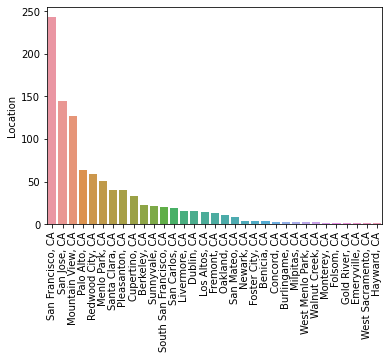

graph for Headquarters: total = 1


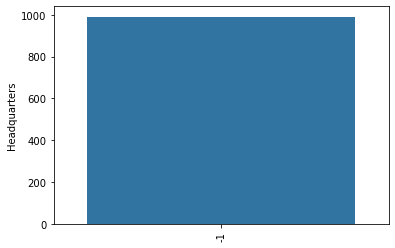

graph for Size: total = 9


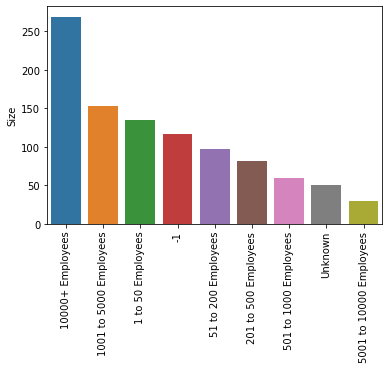

graph for Type of Ownership: total = 13


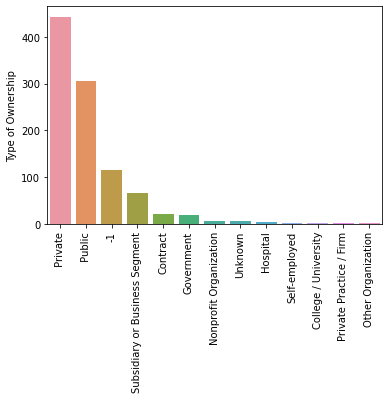

graph for Industry: total = 52


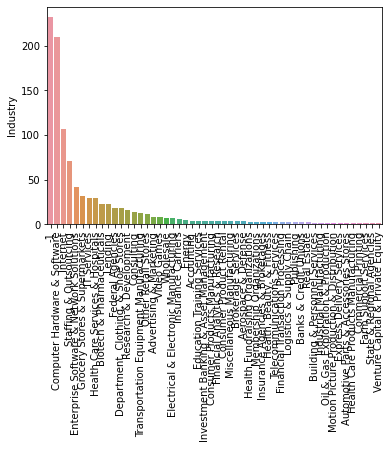

graph for Sector: total = 21


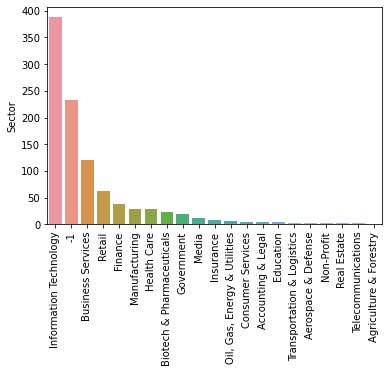

graph for Revenue: total = 14


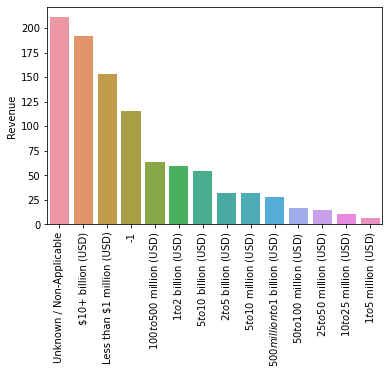

graph for company_txt: total = 346


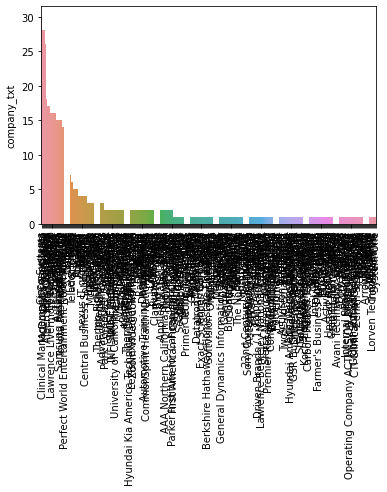

graph for job_state: total = 1


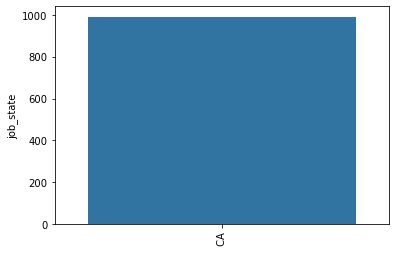

graph for some_state: total = 1


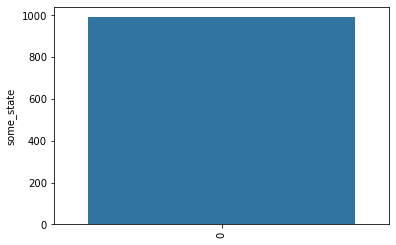

graph for age: total = 72


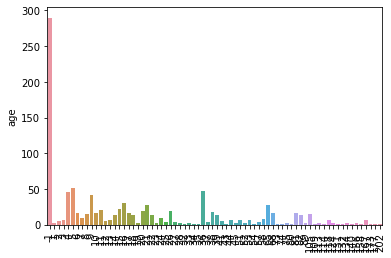

graph for python_yn: total = 2


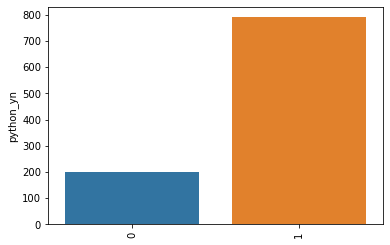

graph for spark_yn: total = 2


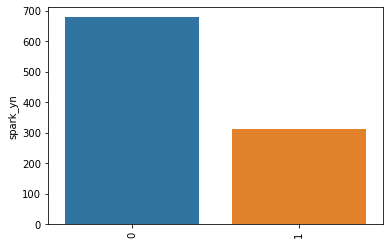

graph for aws_yn: total = 2


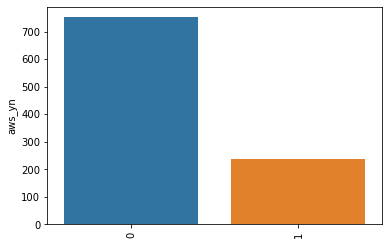

graph for excel_yn: total = 2


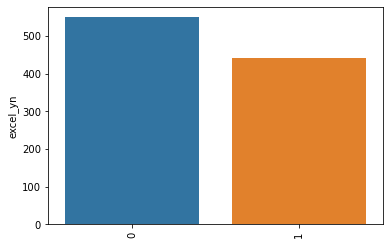

graph for R_yn: total = 1


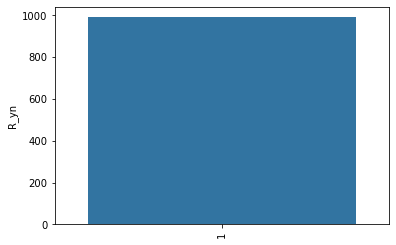

graph for job_simp: total = 4


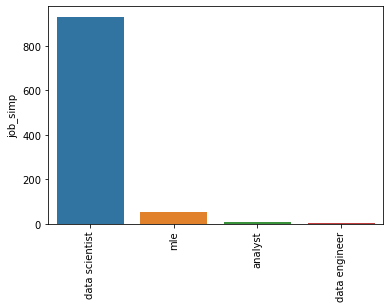

graph for seniority: total = 3


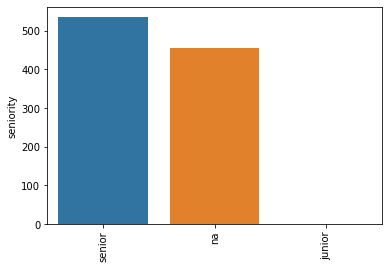

In [79]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for Location: total = 20


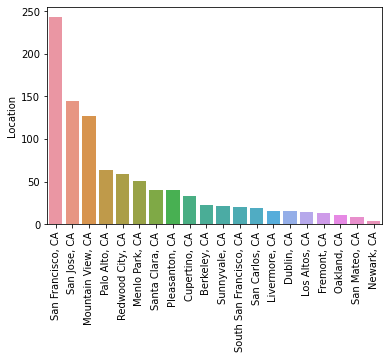

graph for Sector: total = 20


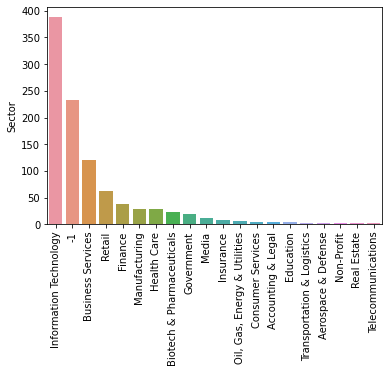

graph for company_txt: total = 20


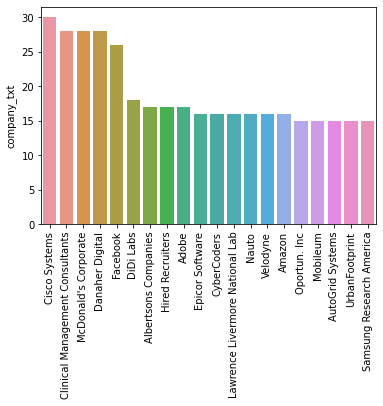

In [83]:
for i in df_cat[['Location','Sector','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    # Looks like San Francisco is hiring a lot of data scientists followed by San jose, Mountain View
    # Then, we see a lot of job opportunites for data scientists in IT, followed by business services and retail
    # The cisco company is hiring a lot of data scientists followed by clincal management and mcdonalds

In [85]:
# Taking a look at salaries by drawing pivot tables and looks like analysts are being payed a lot
pd.pivot_table(df, index = 'job_simp', values = 'average_salary')

,average_salary
job_simp,
analyst,127.857143
data engineer,118.000000
data scientist,156.599462
mle,163.336538


In [86]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'average_salary')
# senior machine learning is being payed the highest and then we see junior data scientist is being payed more than any position of data analyst


average_salary
job_simp       seniority                
analyst        na             119.375000
               senior         139.166667
data engineer  na             118.000000
data scientist junior         153.500000
               na             142.264434
               senior         169.119960
mle            na             137.812500
               senior         174.680556

In [88]:
pd.pivot_table(df, index = 'Location', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
Location,
"Los Altos, CA",184.500000
"Livermore, CA",179.406250
"Cupertino, CA",176.575758
"Dublin, CA",175.625000
"San Jose, CA",174.868056
"Redwood City, CA",171.703390
"San Carlos, CA",169.868421
"Pleasanton, CA",167.750000
"Berkeley, CA",167.630435


In [91]:
pd.pivot_table(df, index = ['Location', 'job_simp'], values = 'average_salary', aggfunc = 'count').sort_values('Location', ascending = False)


average_salary
Location                job_simp                      
West Sacramento, CA     data scientist               1
West Menlo Park, CA     data scientist               2
Walnut Creek, CA        data scientist               2
Sunnyvale, CA           mle                          2
                        data scientist              19
South San Francisco, CA data scientist              19
                        analyst                      1
Santa Clara, CA         mle                          1
                        data scientist              39
San Mateo, CA           data scientist               8
San Jose, CA            analyst                      1
                        data scientist             125
                        mle                         18
San Francisco, CA       mle                          5
                        data scientist             234
                        analyst                      4
San Carlos, CA          data scientist              19
Redwood City, CA        mle                          1
                        data scientist              56
                        data engineer                2
Pleasanton, CA          data scientist              40
Palo Alto, CA           mle                          1
                        data scientist              62
Oakland, CA             data scientist              11
Newark, CA              mle                          1
                        data scientist               3
Mountain View, CA       mle                          1
                        data scientist             126
Monterey, CA            data scientist               1
Milpitas, CA            mle                          2
Menlo Park, CA          mle                          1
                        data scientist              49
                        analyst                      1
Los Altos, CA           mle                         14
Livermore, CA           data scientist              16
Hayward, CA             data scientist               1
Gold River, CA          data scientist               1
Fremont, CA             mle                          4
                        data scientist               9
Foster City, CA         data scientist               4
Folsom, CA              data scientist               1
Emeryville, CA          data scientist               1
Dublin, CA              data scientist              16
Cupertino, CA           mle                          1
                        data scientist              32
Concord, CA             data scientist               3
Burlingame, CA          data scientist               3
Berkeley, CA            data scientist              23
Benicia, CA             data scientist               4

In [92]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
Location,
"Livermore, CA",179.406250
"Cupertino, CA",177.734375
"Dublin, CA",175.625000
"San Jose, CA",175.504000
"Redwood City, CA",173.794643
"San Carlos, CA",169.868421
"Pleasanton, CA",167.750000
"Berkeley, CA",167.630435
"South San Francisco, CA",166.105263


In [93]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_txt', 'Type of Ownership', 'job_state', 'some_state', 'age',
       'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'R_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [102]:
df_pivots = df[['Rating', 'Industry', 'Sector',  'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of Ownership', 'average_salary']]

In [103]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
 2.4        211.500000
 2.5        177.750000
 3.5        169.722772
 4.2        169.435644
-1.0        167.630208
 3.2        166.104651
 3.1        164.880952
 4.3        164.342857
 4.4        162.842105
 3.0        162.722222
 2.9        159.833333
 4.7        159.267857
 3.3        152.092105
 3.9        151.836538
 2.6        148.500000
 2.8        147.333333
 3.4        146.115385
 3.6        145.427273
 4.1        137.906250
 4.9        136.250000
 4.5        135.675000
 3.7        135.500000
 3.8        135.282609
 4.6        133.900000
 5.0        127.966667
 4.0        127.778846
 4.8        125.250000
 1.8        118.000000
 1.0        115.250000
 2.2         96.500000
Industry
                                          average_salary
Industry                                                
Venture Capital & Private Equity              211.500000
Industrial Manufacturing                      211.500000
Health Fundraising O

ValueError: Grouper for 'average_salary' not 1-dimensional

In [ ]:
# So from above information we see that the company with a rating of 2.4 pays maximum out all the companies 
# with different ratings and as we saw since there is negative correlation between rating and average salary, this proves that.
# Then we see that venture capital pays a lot when it comes to average salary. Then if we see the revenue 
# the company with good revenue, do pay the employees good salary and then languages such as R, spark, aws, excel makes a lot of difference

In [108]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'average_salary', aggfunc = 'count')
# So we see what companies with revenue are looking for python developers which will automatically be paying a good amoutn of salary
# Focusing much on python rather than other skills

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),NaN,59.0
$1 to $5 million (USD),2.0,5.0
$10 to $25 million (USD),3.0,8.0
$10+ billion (USD),30.0,162.0
$100 to $500 million (USD),5.0,59.0
$2 to $5 billion (USD),2.0,30.0
$25 to $50 million (USD),4.0,11.0
$5 to $10 billion (USD),2.0,52.0
$5 to $10 million (USD),3.0,29.0


In [ ]:
# end #